<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-mls-project/master/img/GMITLOGO.jpg" width="750"/></p>

# GMIT, H.Dip in Data Analytics, Machine Learning and Statistics Project 2019

## 1. Introduction

This repository contains all of the files pertaining to my 2019 project submission for the Machine Learning and Statistics module of the GMIT H.Dip program in Data Analytics. All of the work contained within this repository was carried out over the course of an 8 week period in October and November 2019. This Jupyter notebook [1] contains the complete documentation for the project.

### 1.1 Project Objective 

The objective of the project concerns the well known *Boston House Prices Dataset*. This is a dataset that contains data that was collected by the U.S. census service in the 1970s[2]. The goal of this project is to analyse this dataset in order to demonstrate proficiency and understanding of many statistical and machine learning concepts. The aim is to use some Python[3] packages such as scipy[4], Jupyter, and keras[5] to gain some insight from the data. For the purpose of assessment the project is broken down into 3 sections as follows:

* **Describe:** In this part of the project, the dataset will be imported into this Jupyter notebook and analysed using descriptive statistics and plots.  
* **Infer:** In this part inferential statistics will be used to investigate the effect that proximity to the Charles river has on median house prices.  
* **Predict:** In this part of the project the dataset will be used to train a neural network that can be used for predicting house prices based on the other data in the dataset.   

<p align="center">
  <img src="img/boston-houses.png" width="750"/>
<div align='center' style='font-size:12px'> <b><i>Boston Houses</i></b></div>  
</p>
  

### 1.2 Project Plan

The plan for this project is as follows:

* In Section 2 the dataset will be loaded and analysed using descriptive statistics. The plan will be to look at the relationships between the different data features rather than each data feature on its own. Where there is a strong relationship between features this will be discussed and analysed further.
* In Section 3 the dataset is to be analysed again to see is there is a statistically significant difference between the median house price in areas along the Charles river, versus those which are not. The focus here will be on selecting an appropriate test for significance. 
* In Section 4 a neural network will be trained using the data in the dataset to try and predict a house price based on other inputs. The neural network will then be evaluated for accuracy and then refined to try and improve it. 
* In the Section 5 the project will be concluded and the relative success of the project will be discussed.

## 2. Describe the Boston Housing Dataset

### 2.1 Introduction to the Boston Housing Price Dataset

The Boston Housing dataset was collected by the US census service in the 1970s. It was first published in 1978 by David Harrison and Daniel Rubinfield in their paper *Hedonic Housing Prices and Demand for Clean Air*[6]. In their study they investigated the possibility of using housing data to see if there was a market demand to pay for clean air. By analysing data about the desirability of individual suburbs in the Boston area, they estimated how willing people were to pay for air quality improvements. They found that minor air pollution damages were found to increase with the level of air pollution and levels of household income.

Since its initial publication it has become a useful dataset in the teaching of statistical modeling and machine learning. There are many reasons for this including:
* It is a a manageable size - there are 506 data points in it - each with 14 features (columns of data measurements).
* There are some interesting relationships between the different features which are worthy of analysis and discussion
* It is a good dataset for demonstrating regression and multivariate statistics.
* It is a real dataset representing a real phenomenon and therefore it is quite interesting fro students to analyse.

### 2.2 Loading the Dataset

In this section, the required Python libraries for the project will be imported. These include:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `seaborn`
* `scipy`
*  
*    
Once the libraries are imported, we will the load the dataset using the `sklearn` package. 

#### 2.2.1 Importing the libraries

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

#### 2.2.2 Loading the dataset from sklearn

In the next block of code we will load the dataset. Note that `sklearn`[7] is a machine learning package for Python. 
In supervised machine learning it is common to divide the data set into model inputs (data) and model outputs (targets)[8]. As the Boston housing dataset is commonly used for regression problems required to predict housing prices, `sklearn` predefines the house prices feature as a target. We have to add this back into data set.

In [2]:
# load the dataset using the sklearn package - https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_boston
boston_house_prices = load_boston()

# create a dataframe with the data from the dataset
df = pd.DataFrame(boston_house_prices.data, columns=boston_house_prices.feature_names)

# add the median value to the dataframe
df["MEDV"] = boston_house_prices.target

# show the head of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The dataset has 14 different columns of data as can be seen above. We can determine the number of rows using the `shape` function

In [3]:
# check the shape of the dataset
df.shape

(506, 14)

This confirms that the dataset has 506 different data points each with 14 columns of data points. The next step is to try and understand what the different columns such as **CRIM**, **ZN**, **INDUS** etc. mean. Luckily there is a handy function in sklearn for this (DESCR). The output of this function contains much detail on the dataset including the following information on the columns names:

* __CRIM__     per capita crime rate by town
* __ZN__       proportion of residential land zoned for lots over 25,000 sq.ft.
* __INDUS__    proportion of non-retail business acres per town
* __CHAS__     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* __NOX__      nitric oxides concentration (parts per 10 million)
* __RM__       average number of rooms per dwelling
* __AGE__      proportion of owner-occupied units built prior to 1940
* __DIS__      weighted distances to five Boston employment centres
* __RAD__      index of accessibility to radial highways
* __TAX__      full-value property-tax rate per \$10,000
* __PTRATIO__  pupil-teacher ratio by town
* __B__        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* __LSTAT__    % lower status of the population
* __MEDV__     Median value of owner-occupied homes in $1000's

So, it can be seen that the dataset contains a good mix of variables covering socioeconomic factors (such as house prices, property tax rates, pupil teacher ratio in the schools, crime rates) as well as locational factors (such as proximity to Charles river, accessibility to highways) ans environmental factors (such as NOX levels). In the next section we will begin to anaylse the data to see what it tells us.

### 2.3 Analysis of the Dataset 

A good place to start when carrying out exploratory data analysis is to use the pandas `describe()` function to get a feel for the columns in the data set.

In [4]:
# describe the dataset
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The output of this is a grid of data summarising the data and it will be useful to refer back to later. There are many options available to us when it comes to analysing this data - we could plot histograms of every column in the set and discuss each feature in turn, but a much more interesting approach is for us to explore the relationships between the features in the dataset to determine if there is any correlation between them.  

One way looking at the relationships between the data would be to plot scatterplots of some of the features against each other to see if there is any obvious relationship between them. The methodology works like this:
* Choose 2 features that you believe to be related
* Plot them against each other using a scatterplot
* Draw the best fit line
* Calculate the correlation co-efficient to determine how well the best-fit line fits the data
an example of this is shown below:

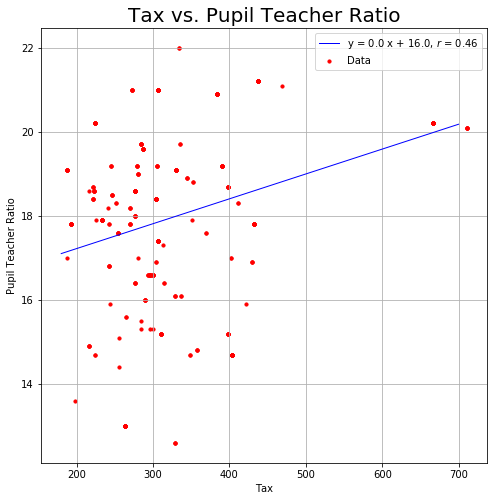

In [5]:
# Resize the plots
plt.rcParams['figure.figsize'] = [8, 8]
# Plot Crime Rate vs. Pupil Teacher Ratio
plt.scatter(df.loc[:, 'TAX'], df.loc[:, 'PTRATIO'],c='red', label='Data', s=10)

# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(df.loc[:, 'TAX'], df.loc[:, 'PTRATIO'])
line_x = np.arange(180, 700, 0.1)
line_y = slope*line_x + intercept

# Plot the best fit line
plt.plot(line_x, line_y, 'b-',linewidth=1, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(slope, intercept, r_value))
plt.title("Tax vs. Pupil Teacher Ratio", size="20")
plt.xlabel("Tax")
plt.ylabel("Pupil Teacher Ratio")
plt.legend()
plt.grid(True)
plt.show()

r (the correlation co-efficient or Pearson's co-efficient) can have a value of between -1 an 1, where values close to 0 indicate a poor fit, values close to 1 indicate a good fit and a positive correlation and values close to -1 indicate a good fit and a negative correlation. The correlation co-efficient (r) that we have calculated above is 0.46. This indicates a poor correlation (this can also be seen by the wide scatter of the data points).

The approach of selecting features ans plotting them against one another can work in a situation where are a few features in a set, or when the analyst has a good idea in advance of what variables might be influencing each other. 

For a dataset like the boston housing set, where there are 14 different features, ans the analyst (me!) is not sure of the relationships - we can use a pandas function to create a correlation matrix. This will give us all of the r values for each pair of data points so we can determine which ones merit further analysis.

#### 2.3.1 Creating the Correlation Matrix and Plotting a Heatmap

In this section we will use python to calculate the correlation matrix and visulaise it with a heatmap using the seaborn library. We will then analyse this heatmap to see if it throws up anything interesting.

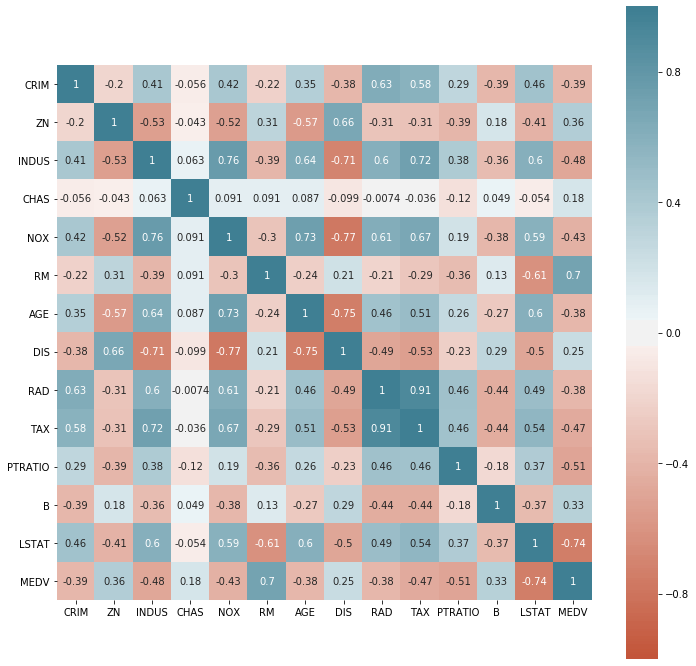

In [6]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [12, 12]

# define the correlation matrix between the data columns in the set
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
corr = df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

#### 2.3.2 Anaylsing the Heat Map

In order to analyse the heat map, we must first determine what a suitable minimum value for r determines a relatively good correlation between a pair of data features. According to the Wikipedia entry for <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Pearson correlation co-efficient</a>[9], several authors have criteria for interpreting this statistic, however most of them are in may ways arbitrary. For example, if somebody was trying to verify <a href="https://en.wikipedia.org/wiki/Ohm%27s_law">Ohm's Law</a>[10] by increasing the voltage in an electrical circuit and measuring the corresponding current. If a scatter plot of this was completed and the correspond r-value calculated, it would be expected (if the electrical components and meters used in the experiment were of high quality) that this r-value would be very close to 1. However, in other field such as social sciences whether is much more noise, and the data generally only give a probability that a relationship between variables is likely, lower values of r are accepted as proof of a good correlation. 

The Boston Housing dataset is very much one from the social sciences. Any relationships between variables are likely to give an impression of the overall trend without being completely precise. For this reason I have chosen to analyse deeper any relationships that have correlation co-efficient of 0.65 or higher (-0.65 or lower for negative correlation!).

A summary of these relationships is listed below:

* The  proportion of residential land zoned for lots over 25,000 sq.ft. is positively correlated with the weighted distances to five Boston employment centres, in other words areas which have larger residential properties are further from the places where most of the jobs are.
* The proportion of non-retail business acres per town is positively correlated to  nitric oxides concentration in the air. This is what would be expected - areas with more industry are likely to burn more fossil fuels.
* The proportion of non-retail business acres per town is also positively correlated to full-value property-tax rate per \$10,000. In other words, areas with more industry tend to have higher property tax returns. Again, this is to be expected.
* The nitric oxide levels are are:
    * Positively correlated to proportion of owner-occupied units built prior to 1940 and full-value property-tax rate per \$10,000
    * Negatively correlated to weighted distances to five Boston employment centers  
    
    This seems to indicate that NOX levels are higher in older areas of the town, where property tax rates are higher
    (more industrial areas), that are shorter distances to the major employment ares. Again this is very much in line
    with what would be expected.
* The average number of rooms per dwelling is positively correlated with the median value of properties in an area. This would be expected - larger properties would be expected to be more expensive.
* The proportion of owner-occupied units built prior to 1940 is negatively correlated to the weighted distances to five Boston employment centers. This means that the older houses are nearer the employment centers (which are the areas with the nigher NOX levels and higher non-retail industry)
* THe index of accessibility to radial highways is positively correlated to the property tax rate. In other words, areas with better transport links (especially for using a private automobile) have higher property tax rates.
* Finally, the % lower status of the population is negatively correlated to the median property value in an area. This seems logical, a higher percentage of poorer people will be able to afford to buy property in areas where the property prices are lower


The initial analysis has given us some ideas to think about. The 2 main areas worthy of deeper analysis are as follows:
* Looking at how the average number of rooms per dwelling and percentage of lower status population are related to the median value of owner-occupied dwellings
* Considering the range of factors that seem to have an impact on NOX levels in the air such as property age, percentage of non-retail industry, distance to employment centers and percentage property tax.

The next analysis will be as follows:
* Create two new pandas dataframes one looking at each relationship
* Plot two new heat maps based on these new data frames
* Create two pair plots using the `seaborn` package to visualise these correlations

We will consider each point in turn

#### 2.3.3 Analysis of the median property value

The first step is to create a new dataframe with just the MEDV, RM and LSTAT columns in it.

In [7]:
# Create a new dataframe
medv_df = df[["MEDV", "RM", "LSTAT"]]
# Check the dataframe to ensure it looks right
medv_df.head()

,MEDV,RM,LSTAT
0,24.0,6.575,4.98
1,21.6,6.421,9.14
2,34.7,7.185,4.03
3,33.4,6.998,2.94
4,36.2,7.147,5.33


Next we will re create the heat map with for `med_df`:

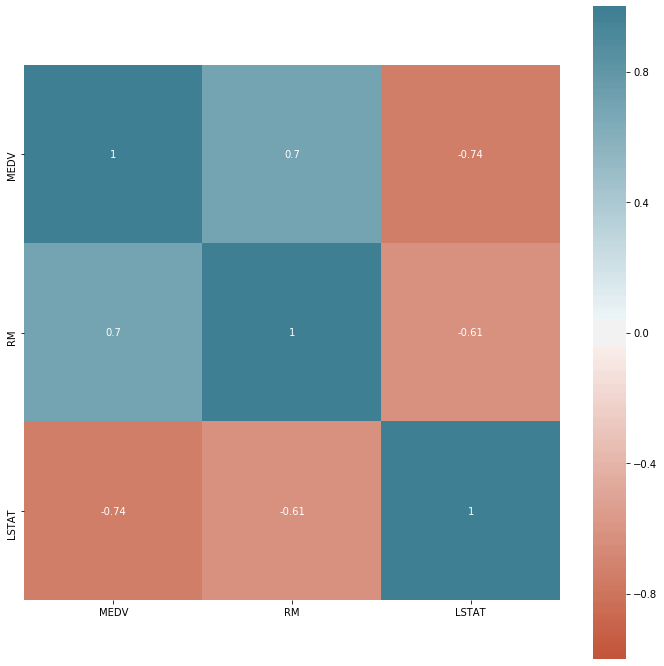

In [8]:
# define the correlation matrix between the data columns in the set
medv_corr = medv_df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(medv_corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

The next step is produce the pair plot to determine the overall shape of these relationships - i.e. are the relationships linear or perhaps a higher order polynomial might be more appropriate to describe the correlation.

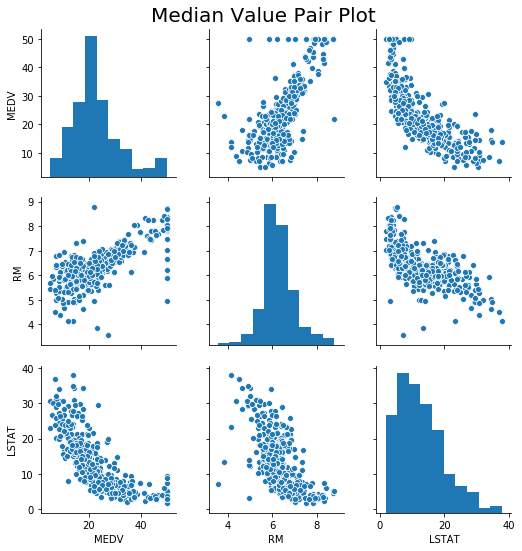

In [9]:
# pair plot to visualise the correlations
medv_pair_plt = sns.pairplot(medv_df)
medv_pair_plt.fig.suptitle("Median Value Pair Plot", size="20", va="bottom")
plt.show()

Analysis of the pair plot:
When analysing a pair plot, I like to start on the diagonal, looking at the distribution of each feature:
* Median values are generally normally distributed - with some outliers for the higher values. The mean is about \$22k and there is a good spread
* Average no of rooms per dwelling is normally distributed with a mean of about 6 (6.28 from section 2.3 above) and not a very big spread (standard deviation is approx 0.7)
* % Lower status population is skewed left, with the most 10-15% being the most frequent (30-40 areas have 10-15% lower status population). There are some areas that have as many as 35% lower status population - though not many, 1 or 2 maximum.

Looking at the relationships between the data:
* Median value seems to be linearly related to the average number of rooms in the dwelling - we can use the `stats.linregress` function to determine the best fit line for this.
* The relationship between median value and \%lower status population is not linear - it is curved. We can use the `numpy.polyfit` function to analyse a quadratic function to see how it fits. 

The next step is to plot these relationships and calculate the best fit lines/curves.

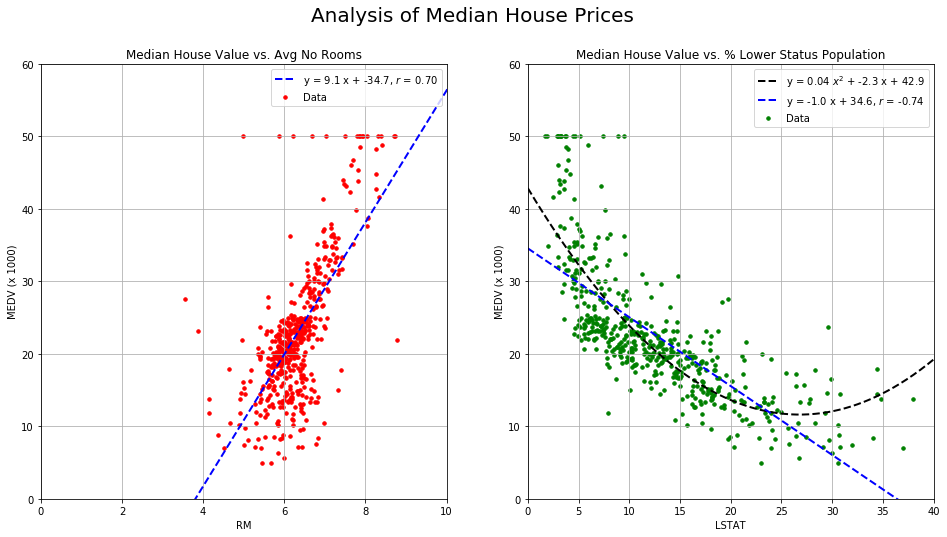

In [10]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [16, 8]

# define the axis for the sub plots (required to put legends on each plot) - https://stackoverflow.com/questions/27016904/matplotlib-legends-in-subplot 
f, (ax1, ax2) = plt.subplots(1,2)

# Plot the Median Value against the Average no. of Rooms
ax1.scatter(medv_df.loc[:, 'RM'], medv_df.loc[:, 'MEDV'],c='red', label='Data', s=12)
ax1.grid(True)
# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(medv_df.loc[:, 'RM'], medv_df.loc[:, 'MEDV'])
# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_rm = np.arange(0,60.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_rm = slope * x_rm + intercept
ax1.plot(x_rm, y_rm, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(slope, intercept, r_value))
# format the plot
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 60])
ax1.set_xlabel("RM")
ax1.set_ylabel("MEDV (x 1000)")
ax1.set_title('Median House Value vs. Avg No Rooms')
ax1.legend(loc="upper right")

# Plot the Median Value against the % Lower Status Population
ax2.scatter(medv_df.loc[:, 'LSTAT'], medv_df.loc[:, 'MEDV'],c='green', label='Data', s=12)
ax2.grid(True)
# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(medv_df.loc[:, 'LSTAT'], medv_df.loc[:, 'MEDV'])
# Use the polyfit function on the data, with the degree set to 2 (i.e. x squared)
poly = np.polyfit(medv_df.loc[:,'LSTAT'], medv_df.loc[:,'MEDV'], 2)

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_lstat = np.arange(0,60.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_lstat = slope * x_lstat + intercept
# Calculate y-values for the quadratic curve
y_poly = poly[0]*(x_lstat**2) + poly[1]*(x_lstat) + poly[2]
plt.plot(x_lstat, y_poly, 'k', linestyle='dashed',linewidth=2, label=r'y = %.2f $x^2$ + %.1f x + %.1f'%(poly[0], poly[1], poly[2])) 

ax2.plot(x_lstat, y_lstat, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(slope, intercept, r_value))
# format the plot
ax2.set_xlabel("LSTAT")
ax2.set_ylabel("MEDV (x 1000)")
ax2.set_xlim([0, 40])
ax2.set_ylim([0, 60])
ax2.set_title('Median House Value vs. % Lower Status Population')
ax2.legend(loc="upper right")

plt.suptitle("Analysis of Median House Prices", size=20)
plt.show()

#### Median House Price Discussion

Even though this dataset was collected in the 1970's with a view to determining whether or not the general population of the Boston area is willing to pay for clean air [6], the dataset is commonly used by data analyst, statisticians and machine learning academics as a means of explaining some of the concepts involved in data analytics. In fact there are myriad blog posts online which use this dataset to illustrate a point - often using it as a way to demonstrate how to determine which relationships are important when training a machine learning algorithm [11], [12], [13], [14].

During the course of analysing the dataset we had determined that the there seemed to be a good linear correlation between house prices and number of rooms - this is intuitive as house with more rooms are likely to be bigger and hence worth more money. We have plotted the best fit line with the data, and this shows that there is a fairly linear relationship between the features as there is an equal spread of data points either side of the line and this condition holds true the entire length of the line. We have also determined the equation of the best fit line as $$ MEDV = 9.1*RM -34.7 $$, and this could be used to help determine the likely price of a house based on the numbers of rooms in it.

We have also considered the relationship between the % lower status population and median house price. The initial analysis hinted at a strong correlation but when it was plotted in the pair plot - it was obvious that the relationship was not linear. This was confirmed when this was plotted with the best fit line. It can be seen that all of the points that are below the line are clustered in the same region between x=5 and x=30. It is clear that a curve might make a better fit and the quadratic relationship between the variables was calculated and plotted. This can be seen to be a much better fit. Again the relationship can be modeled as $$MEDV = 0.04*LSTAT^2 -2.3*LSTAT + 42.9 $$. In the next section features which impact NOX levels will be analaysed.

#### 2.3.4 Analysis of NOX Levels

The first step is to create a new dataframe with the ZN, DIS, INDUS, NOX, TAX, AGE and RAD columns in it.

In [11]:
# Create a new dataframe
nox_df = df[["NOX", "DIS", "INDUS", "TAX", "AGE"]]
# Check the dataframe to ensure it looks right
nox_df.head()

,NOX,DIS,INDUS,TAX,AGE
0,0.538,4.0900,2.31,296.0,65.2
1,0.469,4.9671,7.07,242.0,78.9
2,0.469,4.9671,7.07,242.0,61.1
3,0.458,6.0622,2.18,222.0,45.8
4,0.458,6.0622,2.18,222.0,54.2


Next, we will create a heatmap of `nox_df`:

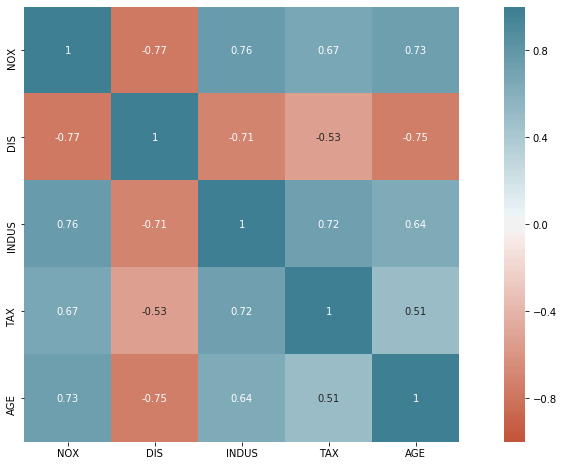

In [12]:
# define the correlation matrix between the data columns in the set
nox_corr = nox_df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(nox_corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

Finally, we create a pair plot to visualise the relationships.

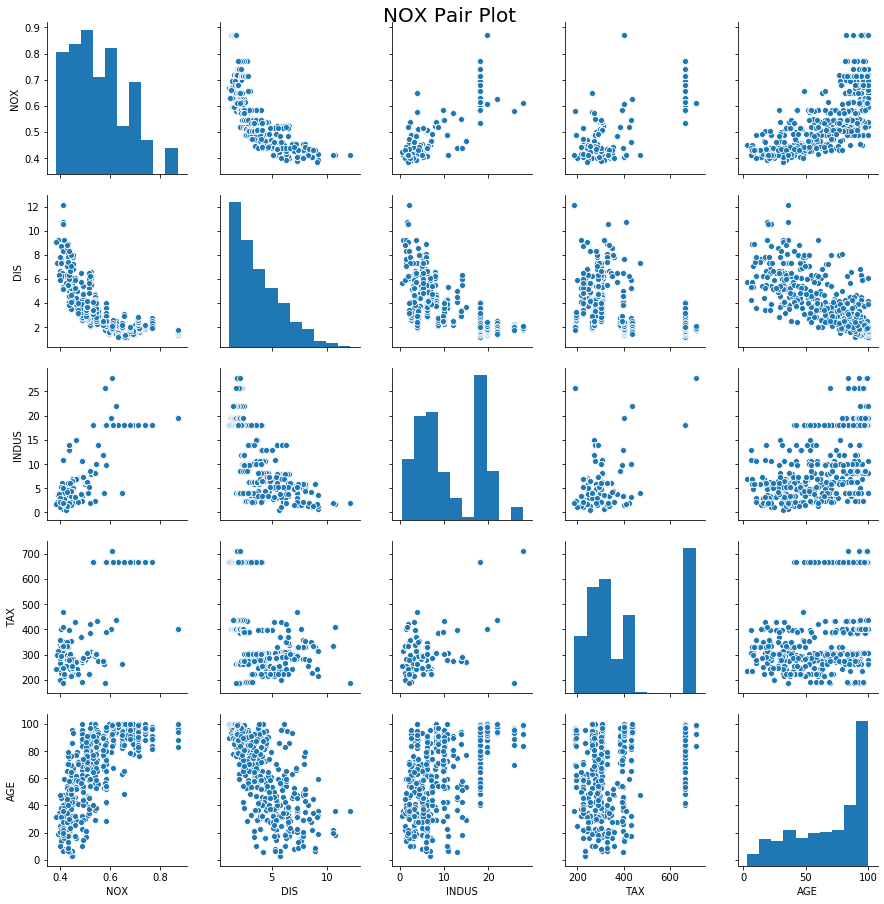

In [13]:
# pair plot to visualise the correlations
nox_pair_plt = sns.pairplot(nox_df)
nox_pair_plt.fig.suptitle("NOX Pair Plot", size="20", va="bottom")
plt.show()

Analysis of the pair plot:
Again starting on the diagonal, looking at the distribution of each feature:
* NOX levels are skewed left - this means that most ares have lower levels of NOX in the air. As we consider higher NOX levels, there are fewer and fewer areas affected.
* The distance the the five employment centers is skewed left - residential properties tend to be near where the jobs are, as you move further away there are less housing areas.
* The distribution of non retail industries is bi-modal with a peak at about 7% and another at about 20%
* The percentage property tax seems to be somewhat normally distributed with some outliers at around 700.
* The proportion of properties built before 1940 of the properties is right skewed - there are more older houses than newer ones. It can be seen that there are a large number of areas that were built entirely before 1940.

Looking at the relationships between the data:
* The first thing to note is that even though some of these pairs of data features have reasonably high r-values - there does not seem to be a good relationship between them. We will only consider the strongly related pairs of data features for further analysis.
* NOX is strongly related to the distance to the five employment centers - the relationship is not linear so we can ue the `numpy.polyfit` function to determine a good model for it.
* The relationship between the NOX levels and the percentage of non retail industry is resonably linear - we can use `stats.liregress` to explore further.
* The relationship between NOX levels and proportion of properties built before 1940 is resonably goods but non-linear. We can explore with `numpy.polyfit`

IN the next part here I need to plot these 3 functions and determine the best line/curve

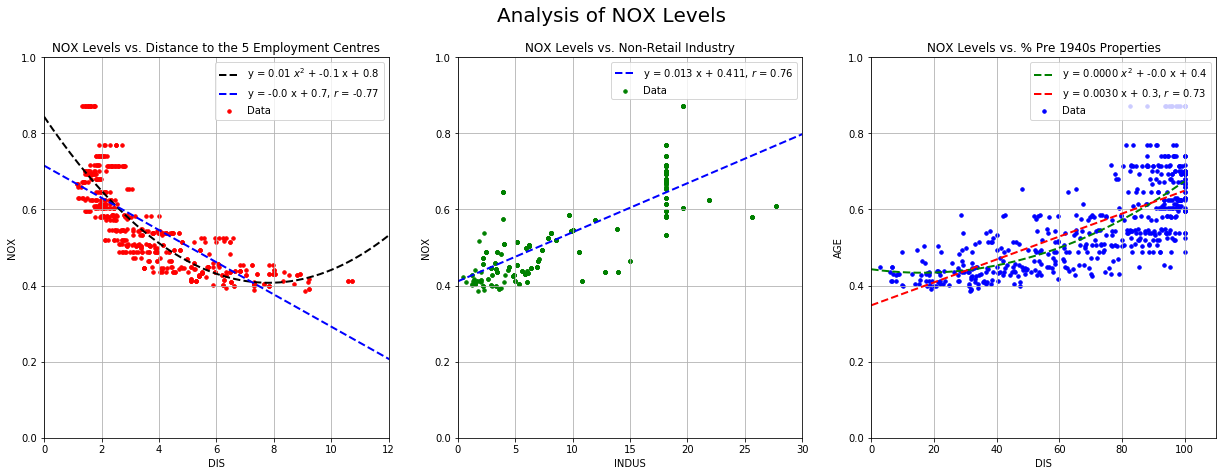

In [14]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [21, 7]

# define the axis for the sub plots (required to put legends on each plot) - https://stackoverflow.com/questions/27016904/matplotlib-legends-in-subplot 
f, (ax1, ax2, ax3) = plt.subplots(1,3)

# Plot NOX against DIS
ax1.scatter(nox_df.loc[:, 'DIS'], nox_df.loc[:, 'NOX'],c='red', label='Data', s=12)
ax1.grid(True)
# Calculate the linear statistics using stats.linregress()
dis_slope, dis_intercept, dis_r_value, dis_p_value, dis_std_err = stats.linregress(nox_df.loc[:, 'DIS'], nox_df.loc[:, 'NOX'])
# Use the polyfit function on the data, with the degree set to 2 (i.e. x squared)
poly_dis = np.polyfit(nox_df.loc[:,'DIS'], nox_df.loc[:,'NOX'], 2)

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_dis = np.arange(0,15.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_dis = dis_slope * x_dis + dis_intercept
# Calculate y-values for the quadratic curve
y_dis_poly = poly_dis[0]*(x_dis**2) + poly_dis[1]*(x_dis) + poly_dis[2]

# plot the best fit line and 2nd order polynomial
ax1.plot(x_dis, y_dis_poly, 'k', linestyle='dashed',linewidth=2, label=r'y = %.2f $x^2$ + %.1f x + %.1f'%(poly_dis[0], poly_dis[1], poly_dis[2])) 
ax1.plot(x_dis, y_dis, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(dis_slope, dis_intercept, dis_r_value))
# format the ax1 plot
ax1.set_xlim([0, 12])
ax1.set_ylim([0, 1.0])
ax1.set_xlabel("DIS")
ax1.set_ylabel("NOX")
ax1.set_title('NOX Levels vs. Distance to the 5 Employment Centres')
ax1.legend(loc="upper right")

# Plot the NOX against INDUS
ax2.scatter(nox_df.loc[:, 'INDUS'], nox_df.loc[:, 'NOX'],c='green', label='Data', s=12)
ax2.grid(True)
# Calculate the linear statistics using stats.linregress()
indus_slope, indus_intercept, indus_r_value, indus_p_value, indus_std_err = stats.linregress(nox_df.loc[:, 'INDUS'], nox_df.loc[:, 'NOX'])

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_indus = np.arange(0,60.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_indus = indus_slope * x_indus + indus_intercept

# plot the best fit line
ax2.plot(x_indus, y_indus, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.3f x + %.3f, $r$ = %.2f'%(indus_slope, indus_intercept, indus_r_value))

# format the plot
ax2.set_xlabel("INDUS")
ax2.set_ylabel("NOX")
ax2.set_xlim([0, 30])
ax2.set_ylim([0, 1.0])
ax2.set_title('NOX Levels vs. Non-Retail Industry')
ax2.legend(loc="upper right")

# Plot NOX against AGE
ax3.scatter(nox_df.loc[:, 'AGE'], nox_df.loc[:, 'NOX'],c='blue', label='Data', s=12)
ax3.grid(True)
# Calculate the linear statistics using stats.linregress()
age_slope, age_intercept, age_r_value, age_p_value, age_std_err = stats.linregress(nox_df.loc[:, 'AGE'], nox_df.loc[:, 'NOX'])
# Use the polyfit function on the data, with the degree set to 2 (i.e. x squared)
poly_age = np.polyfit(nox_df.loc[:,'AGE'], nox_df.loc[:,'NOX'], 2)

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_age = np.arange(0,100,0.1)
# Calculate the y values using the slope and intercept calculted
y_age = age_slope * x_age + age_intercept
# Calculate y-values for the quadratic curve
y_age_poly = poly_age[0]*(x_age**2) + poly_age[1]*(x_age) + poly_age[2]

# plot the best fit line and 2nd order polynomial
ax3.plot(x_age, y_age_poly, 'g', linestyle='dashed',linewidth=2, label=r'y = %.4f $x^2$ + %.1f x + %.1f'%(poly_age[0], poly_age[1], poly_age[2])) 
ax3.plot(x_age, y_age, 'r-', linestyle='dashed',linewidth=2, label=r'y = %.4f x + %.1f, $r$ = %.2f'%(age_slope, age_intercept, age_r_value))
# format the ax1 plot
ax3.set_xlim([0, 110])
ax3.set_ylim([0, 1.0])
ax3.set_xlabel("DIS")
ax3.set_ylabel("AGE")
ax3.set_title('NOX Levels vs. % Pre 1940s Properties')
ax3.legend(loc="upper right")

plt.suptitle("Analysis of NOX Levels", size=20)
plt.show()

#### NOX Levels Discussion

The original intent of the surveyors who collected this data was to determine the economic benefits of having clean air [6]. So it is important to consider what kinds of things drive pollution when analysing this data.

Initial analysis of the data set showed us that there seems to be a good, but non-linear negative correlation between NOX levels and the Distance to the 5 main employment centres. This would be what would be expected - areas where people are employed are likely to have more industry in them and therefore there is likely to be more air pollution generated as part of this industrial activity. As part of the analysis we fitted a 2nd order polynomial to try to represent this relationship: $$NOX = 0.01 * DIS^2 -0.1 * DIS + 0.8 $$

This evidence is corroborated by the fact the there is a positive correlation between the amount of non retail industry in a town and the levels of NOX in the ambient air. This relationship seems fairly linear and is approximated as: $$NOX = 0.013 * INDUS + 0.411 $$

The last point to make on this to consider the relationship between NOX levels and the percentage of properties built before which is a positive correlation. I have fitted both a linear and polynomial model to this relationship and it looks to be that there is not mush difference between them over the range of our dataset, this means that the linear model will be sufficient: $$NOX = 0.003 * AGE + 0.3 $$

This would seem to indicate that there are worse NOX levels in areas that have a higher proportion of older houses. So, considering the orignal pupose of this data and analysing what the economic implication of air pollution and whether or not people would be prepared to pat for clean air - we will consider one more set of relationships. In the original heatmap in section 2.3.1 is can be seen that there is a positive correlation of 0.6 between AGE and LSTAT. This means that areas with older houses in thembtend to have higher proportions of poorer people in them.

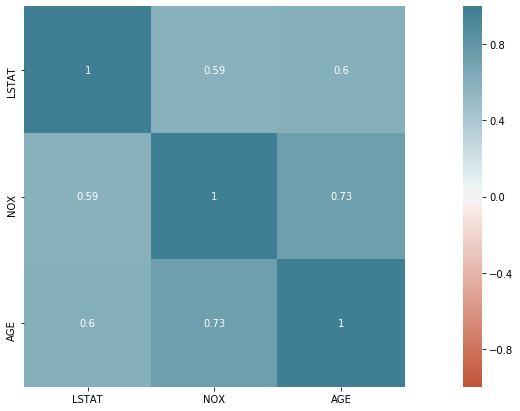

In [15]:
# Create a new dataframe
lstat_df = df[["LSTAT", "NOX", "AGE"]]

# define the correlation matrix between the data columns in the set
lstat_corr = lstat_df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(lstat_corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

Next lets consider the pair plot for this relationship:

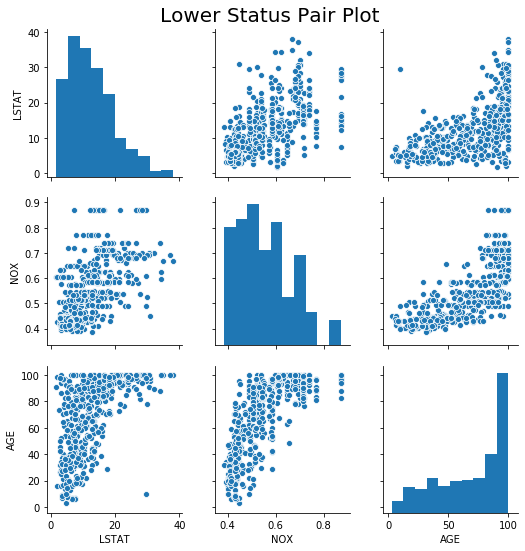

In [16]:
# pair plot to visualise the correlations
lstat_pair_plt = sns.pairplot(lstat_df)
lstat_pair_plt.fig.suptitle("Lower Status Pair Plot", size="20", va="bottom")
plt.show()

These plots do show that NOX levels tend to be higher in areas with a higher proportion of lower status people. Therefore there may not be huge willingness for people to pay for air quality improvements - as better off people are more likelt to live in areas with cleaner air, and the poorer people who are more likely to  live in areas with lower quality air are unlikely to be able to pay for these improvements

## 3. Comparing House Prices with Inferential Statistics

In section 2 we used descriptive statistics to describe the relationships between the various features of the Boston housing data set. In this section we are going to use *inferential statistics* to investigate the relationship between the proximity of a house to the Charles river and median value of houses in that area. The plan for this section is as follows:

* Introduce inferential statistics
* Consider the *t-test* with respect to the dataset 
* Select an appropriate *t-test* and carry it out on the data
* Present the results and discuss the findings

#### 3.1 Introduction to Inferential Statistics

Inferential statistics allow us to make prediction or inferences from a set of sample data [15]. When using inferential statistics, an analyst will take samples of data and analyse these in order to make generalisations about the entire population. This is often done because it is infeasible, impractical or impossible to analyse the entire population. One case where inferential statistics are used heavily is in political opinion polls. When carrying these polls it is not possible to ask everybody in the entire country their opinion on a particular matter, instead the researchers will choose a representative sample of the population and survey that. They will then analyse the results of from this surveyed sample and make inferences about the entire population from this. There are two main areas of inferential statistics, these are:

1. Estimation (of a population statistic based on a sample statistic)
1. Hypothesis Testing (comparing the means of two related groups of data)

#### 3.1.1 Estimation [16]

Take the case where a researched wants to determine what proportion of children aged 8 to 10 like football. What tey could do is design a survey where they take a sample of 1000 children and survey them. A properly designed survey will ensure that the sample includes a proportional amount of children based on gender, whether they are urban or rural, economic background etc. However, no matter how well the sample is chosen the researcher must remember that it is still just a sample of the population - and that these samples can vary. I other words if the survey was repeated using the same proportions of boys/girls, urban/rural but using different children he results are likely to vary from survey to survey. In order to build confidence in the research, a *margin of error (MOE)* should be included with all inferential estimation statistics. The MOE measures how close the sample statistic is likely to be to the population parameter that is being studied. The MOE is calculated to a confidence interval decided by the researcher. If the survey in question was to be carried out a large number of times, most times the sample mean will be close to the population mean, but these survey means will be distributed and there is always a small chance that some surveys will show very high proportions of children age 8 to 10 that like football, (or very low proportions). 

The process the researcher will follow is this:

* Calculate the sample mean (say 60%) - this says 60% of children aged 8 to 10 like football
* Decide on a confidence interval for the margin of error (i.e. what percentage of samples are likely to fall within the margin or error - say 95%)
* Use a Standard Normal Distribution (Normal Distribution with mean = 0 and standard deviation = 1), to determine a z value at 95% (this is 1.96)
* Calculate the margin of error as follows:
$$ MOE = z * \sqrt{p(1-p)/n}$$

Where:
* z is determined from the table
* n is the sample size
* p is the sample proportion (60% in the example above)

We can calculate the MOE using python.

In [7]:
# define the variables
n = 1000
p = 0.60
z = 1.96
# calculate the MOE
MOE = (z * (p*(1-p)/n)**0.5)

print("The % margin of error for this study is:", round(MOE*100,2), "%")

The % margin of error for this study is: 3.04 %


So the researcher could conclude that the percentage of all children aged 8 to 10 that like football is 60% with a margin of error of 3% at a 95% confidence interval. What this means is that is 1000 children aged 8 to 10 were polled as to whether or not they like football, the result would lie between 57% and 63% 95% of the time.

#### 3.1.2 Hypothesis Testing

When carrying out a comparison study is not possible, or feasible to compare every subject that is to be studied. Instead we must collect a sample dataset and analyse that. From this we can make inferences about the population. An everyday application of this is in clinical trials for new medicines. If a pharmaceutical company wants to compare the performance of a new blood pressure medication to see if it provides better outcomes for patients than the current medication available it might carry out a trial as follows:
1. Select a 2000 people with high blood pressure
1. Measure their blood pressure before the trial
1. Give 1000 the current medication for 6 months
1. Give 1000 the new medication for 6 months
1. Measure their blood pressure again after 6 months and calculate the delta (difference between start and end blood pressure)
1. Calculate the average delta for the group on the old medication
1. Calculate the mean delta for the group on the new medication
1. Compare them to see if the the new medication has a higher delta than the old one (and hence is it more effective)

An issue with this method is that we have only considered a sample of the entire population. It is possible that if we repeated the test numerous times with different test subjects we would get many different outcomes and the actual mean deltas in blood pressure would be distributed. In order to determine the statistical significance of the findings of the study a *t-test* is carried out.

The steps for carrying out a t-test are as follows [17]:

1. State the hypothesis
1. Formulate an analysis plan
1. Analyse sample data
1. Interpret the results

**State the Hypothesis**

**Formulate and analysis plan**

**Analyse sample data**

**Interpret the results**

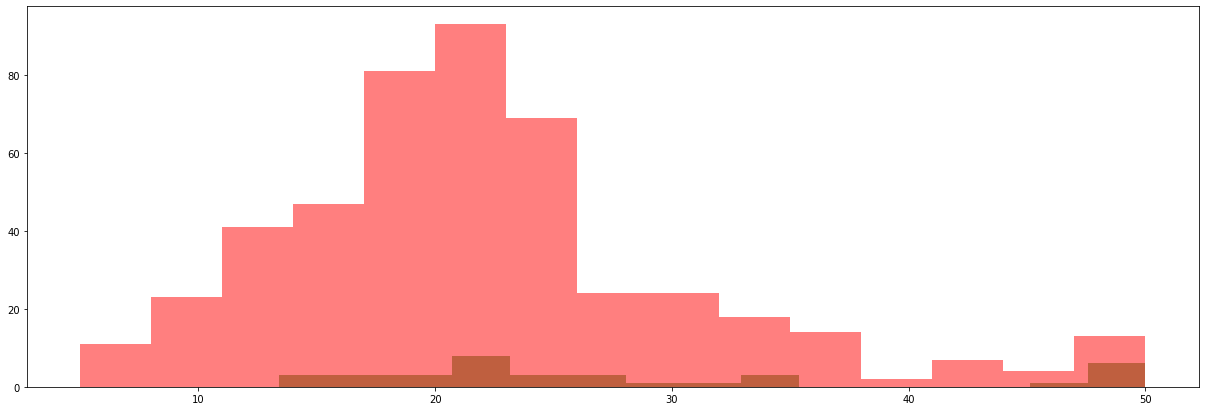

In [64]:
# split the data in 2 2 dataframes depending on location
df_near_chas = df[df["CHAS"]==1]
df_not_chas = df[df["CHAS"]==0]

plt.hist(df_near_chas["MEDV"], bins=15, color="green", alpha=0.5)
plt.hist(df_not_chas["MEDV"], bins=15, color="red", alpha=0.5)
plt.show()

In [72]:

print("The mean of the median values of houses near the charles river is: ",df_near_chas["MEDV"].mean(),"thousand dollars")
print("The mean of the median values of houses not near the charles river is: ",df_not_chas["MEDV"].mean(),"thousand dollars")

The mean of the median values of houses near the charles river is:  28.44 thousand dollars
The mean of the median values of houses not near the charles river is:  22.093842887473482 thousand dollars


In [68]:
stats.ttest_ind(df_not_chas["MEDV"], df_near_chas["MEDV"])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

## 4. Predicting Boston House Prices with Keras

In [26]:
import sklearn.linear_model as lm
import pandas as pd
# create 2 identical arrays
x = [1,2,3,4,5]
y = [1,2,3,4,5]
# put them in a datafram
df = pd.DataFrame(x)
df[1] = y
# name the columns
df.columns = ['x', 'y']

# define the inputs and outputs for the model
inputs = df[['x']]
outputs = df['y']

# fit the model
m = lm.LinearRegression()
m.fit(inputs,outputs)


,x,y
x,1.0,1.0
y,1.0,1.0


In [60]:
# get the coeficients
m.coef_

array([1.])

In [61]:
# and the intercept
m.intercept_

0.0

In [62]:
# and the r2 value
m.score(inputs,outputs)

1.0

## 5. Conclusions

## References

1. [1] Project Jupyter. Project Jupyter Home. https://www.jupyter.org/
1. [2] University of Toronto. Boston Dataset. https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
1. [3] Python Software Foundation. Welcome to python.org. https://www.python.org/
1. [4] SciPy developers. The scipy python package. https://www.scipy.org/
1. [5] Keras Team. Keras: The python deep learning library. https://keras.io/
1. [6] Hedonic Housing Prices and the Demand for Clean Air. Harrison and Rubinfield. 1978
1. [7] sklearn developers. The sklearn python package. https://scikit-learn.org/stable/.
1. [8] sklearn developers. Dataset loading. https://scikit-learn.org/stable/datasets/index.html
1. [9] Wikipedia. Pearson Correlation Coefficient. https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
1. [10] Wikipedia. Ohm's Law. https://en.wikipedia.org/wiki/Ohm%27s_law
1. [11] www.towardsdatascience.com. Predicting Boston House Prices with Regression. https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d  
1. [12] www.towardsdatascience.com. Linear Regression on Boston Housing Dataset. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155  
1. [13] Northwestern Unversity. Boston Home Values, across U.S. Census Tracts. https://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/Boston.htm  
1. [14] SciPy Developers. A simple regression analysis on the Boston housing data. https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html  
1. [15] Statistics How To. What is Inferential Statistics. https://www.statisticshowto.datasciencecentral.com/inferential-statistics/
1. [16] Deborah J. Rumsey. Statistics for Dummies. Chapter 12 - Leaving Room for a Margin of Error. 
1. [17] www.stattrek.com. Hypothesis Test: Difference Between Means. https://stattrek.com/hypothesis-test/difference-in-means.aspx


## End